# To create a model for Image classification of Handwritten Digits from 0-9

## Importing Libraries and Dataset

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist #28x28 images of handwritten digits from 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Loading few images from the dataset

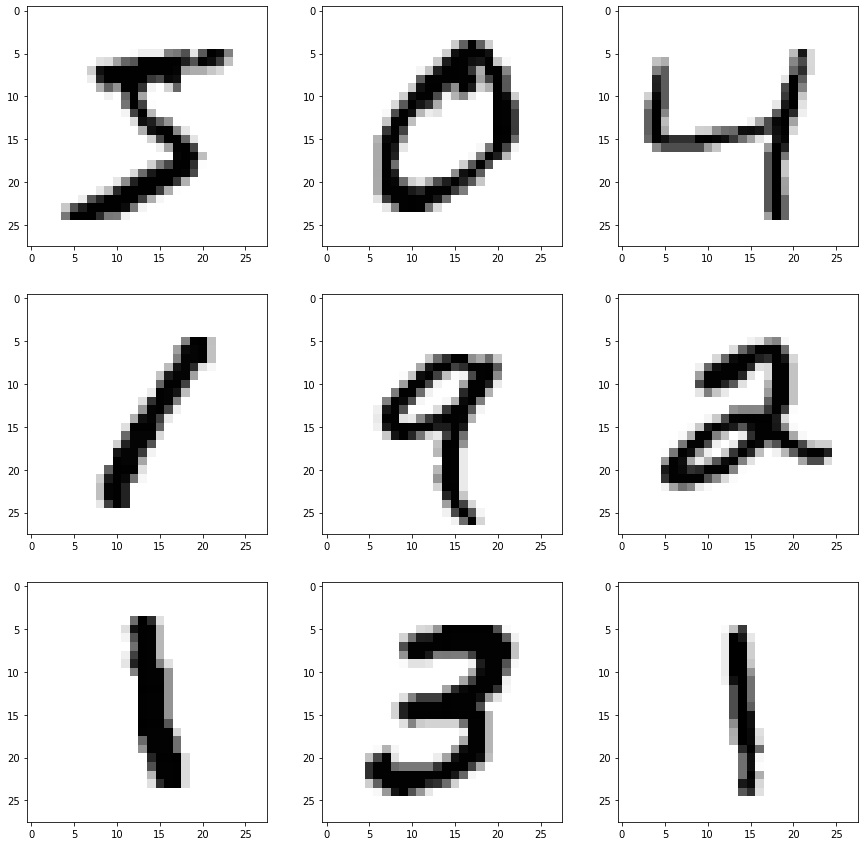

In [ ]:
plt.figure(figsize=(15,15))
plot=0
for i in range(9):
    plot+=1
    ax=plt.subplot(3,3,plot)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

The max pixel value of the images is 255

In [ ]:
x_train.max()

255

## Standardizing the Data

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

The pixel values have been scaled from 0 to 1 which helps the neural network in faster data processing and thus reducing training time.

# Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
tf.__version__

'2.9.1'

Creating a 3 dimensional input array as expected by tensorflow

In [ ]:
x_train = x_train.reshape(60000,28,28,1) #(number of obs, rows, columns, channel)
x_test = x_test.reshape(10000,28,28,1)

## CNN Architecture

In [ ]:
model = Sequential()

#CNN

#First convolutional layer
model.add(Conv2D(filters=32, kernel_size = (3,3), activation='relu',input_shape=(28,28,1) ))

#First Max Pool Layer
model.add(MaxPool2D(2,2))

#Second Convolutional layer
model.add(Conv2D(filters=64, kernel_size = (3,3), activation='relu' ))

#Second Max Pool Layer
model.add(MaxPool2D(2,2))

#Dropout layer to regularize network and to avoid overfitting
model.add(Dropout(0.25)) #25% of neurons will be randomly dropped while moving to next layer

#Flattening layer
model.add(Flatten())


#BASIC NEURAL NETWORK

#Dense Layer
model.add(Dense(units=128, activation='relu'))

#Dropout Layer
model.add(Dropout(0.50))

model.add(Dense(units=10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

## Compiling Model
Configures the model for training.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fitting and Saving the Model

ModelCheckpoint callback is used in conjunction with training using model.fit () to save the best model or weights (in a checkpoint file) that can be loaded later to continue the training from the state saved.

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="handwritten_digit_cnn_model.keras", # path to save the model file
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(x_train,y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test,y_test),
                    callbacks=callbacks)

Epoch 1/10
469/469 [==============================] - 27s 56ms/step - loss: 0.3809 - accuracy: 0.8842 - val_loss: 0.0823 - val_accuracy: 0.9746
Epoch 2/10
469/469 [==============================] - 27s 57ms/step - loss: 0.1284 - accuracy: 0.9615 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0939 - accuracy: 0.9724 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.0310 - val_accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.0309 - val_accuracy: 0.9891
Epoch 7/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0292 - val_accuracy:

## Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc:.3f}\nTest loss: {test_loss:.3f}")

313/313 [==============================] - 1s 5ms/step - loss: 0.0251 - accuracy: 0.9916
Test accuracy: 0.992
Test loss: 0.025


In [ ]:
y_pred=model.predict(x_test)
y_pred =[np.argmax(i) for i in y_pred]


313/313 [==============================] - 1s 4ms/step


In [ ]:

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    1,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   2,    0, 1024,    0,    0,    0,    0,    5,    1,    0],
       [   0,    0,    1, 1003,    0,    4,    0,    1,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   2,    0,    0,    5,    0,  883,    1,    1,    0,    0],
       [   4,    2,    0,    0,    1,    2,  949,    0,    0,    0],
       [   0,    4,    3,    0,    0,    0,    0, 1018,    1,    2],
       [   2,    0,    3,    1,    0,    1,    0,    3,  961,    3],
       [   3,    2,    0,    1,    5,    7,    0,    1,    0,  990]])>

Text(69.0, 0.5, 'True')

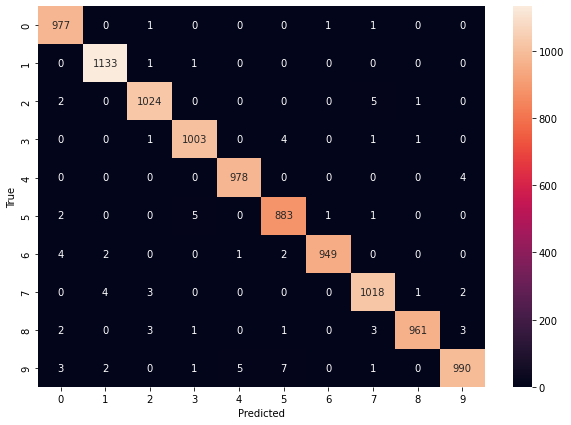

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")

The above heatmap helps us better visualize the confusion matrix. The values with warm colours show that the true positives i.e correct digit predictions is very high for our model as comapred to the number of misclassifications. Thus we can conclude that our model performs extremely well.

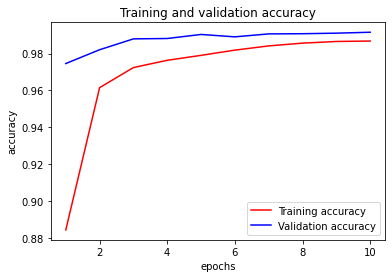

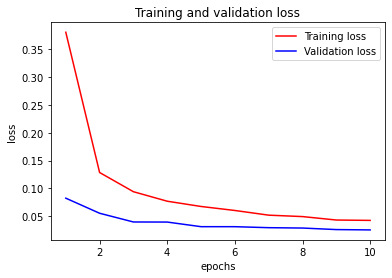

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

We can see that the for the training set accuracy shoots up and loss falls down after 2 epochs which continues to reach a stable path by 10 epochs. The validation dataset shows a smoother slow incline for accuracy and decline for loss as the epochs increase. These graphs show that are model performance is excellent.

## Loading the Model

In [ ]:
test_model = tf.keras.models.load_model("handwritten_digit_cnn_model.keras")



## Testing the model with digits I wrote

Using paint, I wrote a few digits, converted it into images and ran it through the model. The results are as follows.

![Digit-2.png](attachment:Digit-2.png)

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "Digit-2.png", target_size=(28,28,1), color_mode="grayscale"
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.utils.normalize(img_array)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = test_model.predict(img_array)

1/1 [==============================] - 0s 18ms/step


In [ ]:
print(f"The CNN model predicts the above image to be {np.argmax(predictions[0])}")

The CNN model predicts the above image to be 2


![Digit-8.png](attachment:Digit-8.png)


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "Digit-8.png", target_size=(28,28,1), color_mode="grayscale"
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.utils.normalize(img_array)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = test_model.predict(img_array)

1/1 [==============================] - 0s 17ms/step


In [ ]:
print(f"The CNN model predicts the above image to be {np.argmax(predictions[0])}")

The CNN model predicts the above image to be 8


![Digit-7.png](attachment:Digit-7.png)

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "Digit-7.png", target_size=(28,28,1), color_mode="grayscale"
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.utils.normalize(img_array)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = test_model.predict(img_array)

1/1 [==============================] - 0s 19ms/step


In [ ]:
print(f"The CNN model predicts the above image to be {np.argmax(predictions[0])}")

The CNN model predicts the above image to be 7


## Thus our model was correctly able to predict the digits I had written.